<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Q1" data-toc-modified-id="Q1-1">Q1</a></span><ul class="toc-item"><li><span><a href="#Q1-Answer" data-toc-modified-id="Q1-Answer-1.1">Q1 Answer</a></span></li></ul></li><li><span><a href="#Environment-Setup" data-toc-modified-id="Environment-Setup-2">Environment Setup</a></span></li><li><span><a href="#Q2-Deep-Graph-Library-(DGL)" data-toc-modified-id="Q2-Deep-Graph-Library-(DGL)-3">Q2 Deep Graph Library (DGL)</a></span><ul class="toc-item"><li><span><a href="#Q2-1,-Load-data" data-toc-modified-id="Q2-1,-Load-data-3.1">Q2-1, Load data</a></span><ul class="toc-item"><li><span><a href="#Prepare-Data-for-training-&amp;-testing" data-toc-modified-id="Prepare-Data-for-training-&amp;-testing-3.1.1">Prepare Data for training &amp; testing</a></span></li></ul></li><li><span><a href="#Q2-2,-Use-the-graph-neural-network-model" data-toc-modified-id="Q2-2,-Use-the-graph-neural-network-model-3.2">Q2-2, Use the graph neural network model</a></span></li></ul></li><li><span><a href="#Q2-Tasks" data-toc-modified-id="Q2-Tasks-4">Q2 Tasks</a></span><ul class="toc-item"><li><span><a href="#Q2(a)-Train-and-Test-GNN" data-toc-modified-id="Q2(a)-Train-and-Test-GNN-4.1">Q2(a) Train and Test GNN</a></span><ul class="toc-item"><li><span><a href="#Technical-Details" data-toc-modified-id="Technical-Details-4.1.1">Technical Details</a></span></li><li><span><a href="#Build-a-graph-neural-network-via-GINConv:" data-toc-modified-id="Build-a-graph-neural-network-via-GINConv:-4.1.2">Build a graph neural network via GINConv:</a></span></li><li><span><a href="#Train-&amp;-Evaluation" data-toc-modified-id="Train-&amp;-Evaluation-4.1.3">Train &amp; Evaluation</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-4.1.4">Plot</a></span></li><li><span><a href="#Run-the-Train-+-Test" data-toc-modified-id="Run-the-Train-+-Test-4.1.5">Run the Train + Test</a></span><ul class="toc-item"><li><span><a href="#Train-&amp;-Test-1-hidden-layer-GNN" data-toc-modified-id="Train-&amp;-Test-1-hidden-layer-GNN-4.1.5.1">Train &amp; Test 1-hidden-layer GNN</a></span></li><li><span><a href="#Train-&amp;-Test-2-hidden-layer-GNN" data-toc-modified-id="Train-&amp;-Test-2-hidden-layer-GNN-4.1.5.2">Train &amp; Test 2-hidden-layer GNN</a></span></li></ul></li><li><span><a href="#q2a)-Test-the-saved-best_model" data-toc-modified-id="q2a)-Test-the-saved-best_model-4.1.6">q2a) Test the saved <code>best_model</code></a></span></li></ul></li></ul></li><li><span><a href="#Hi-Professor/TA,-my-GNN-has-at-least-7x%-accuracy-on-val_mask-data.-If-you-get-6x%-accuracy-or-lower,-please-restart-and-re-run-this-notebook.-Thanks!" data-toc-modified-id="Hi-Professor/TA,-my-GNN-has-at-least-7x%-accuracy-on-val_mask-data.-If-you-get-6x%-accuracy-or-lower,-please-restart-and-re-run-this-notebook.-Thanks!-5">Hi Professor/TA, my GNN has at least <code>7x%</code> accuracy on <code>val_mask</code> data. If you get <code>6x%</code> accuracy or lower, please <code>restart and re-run this notebook</code>. Thanks!</a></span><ul class="toc-item"><li><span><a href="#Q2(b)-Generate-a-random-feature-matrix" data-toc-modified-id="Q2(b)-Generate-a-random-feature-matrix-5.1">Q2(b) Generate a random feature matrix</a></span></li><li><span><a href="#Q2(c)" data-toc-modified-id="Q2(c)-5.2">Q2(c)</a></span><ul class="toc-item"><li><span><a href="#q2c)-Test-the-saved-best_model_random" data-toc-modified-id="q2c)-Test-the-saved-best_model_random-5.2.1">q2c) Test the saved <code>best_model_random</code></a></span></li><li><span><a href="#q2c)-Compare-your-results-in-(a)-and-comment-on-the-results." data-toc-modified-id="q2c)-Compare-your-results-in-(a)-and-comment-on-the-results.-5.2.2">q2c) Compare your results in (a) and comment on the results.</a></span></li></ul></li></ul></li></ul></div>

# Q1
Consider the graphs below. Which one of the four graphs is most likely to have been generated by a random graph model Gn,p with n = 5 and p = 0.8? Explain clearly.

<img src="img-q1.png" width="700">

___

## Q1 Answer

`C` is most likely the $G_{n=5,p=0.8}$, because there is 10 edges $\le E_{max}$ and degree of each node $= 4 \approx E[X_v] = 3.2$, which is more likely to match with the static info of $G_{n=5,p=0.8}$.

* Static info of $G_{n=5,p=0.8}$:
    1. Expected degree of each node, $E[X_v] = (n-1)p = 3.2$
    2. Max. edge number, $E_{max} = n(n-1)/2 = 10$
    

* Reason why the below graph is less likely the $G_{n=5,p=0.8}$
    1. Graph `A`:  Degree of each node is 1 to 2, which $<< E[X_v]$
    2. Graph `B`:  There are 6 nodes exceeds $n = 5$
    3. Graph `D`:  Degree of each node is 0 to 1, which $<< E[X_v]$



# Environment Setup

In [1]:
from typing import List, Dict, Iterable
import time
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import matplotlib.pyplot as plt

import pickle as pkl
import dgl
# https://docs.dgl.ai/api/python/nn.pytorch.html#dgl.nn.pytorch.conv.GINConv
from dgl.nn import GINConv

import torch


Using backend: pytorch


# Q2 Deep Graph Library (DGL)

In this question, you are required to use DGL to build a graph neural network for node classification. The dataset hw dataset.pkl can be downloaded from [https://drive.google.com/file/d/1QA4HEsAKtyg9tGrOvIDWltu9lx6t_T2v/view?usp=sharing](https://drive.google.com/file/d/1QA4HEsAKtyg9tGrOvIDWltu9lx6t_T2v/view?usp=sharing)

## Q2-1, Load data

Load the dataset with the following command:

``` python
dataset = pkl.load(open("hw_dataset.pkl", "rb"))
```

This file contains a dictionary object with the following information of a directed graph:
* `nodes`: a list containing the id’s of all the nodes in the graph;
* `labels`: a list containing the label of each node;
* `num_classes`: the total number of node labels;
* `features`: a matrix of size: number-of-nodes × feature-dimensionality;
* `source_nodes`: a list containing the source node-id of each (directed) edge;
* `target_nodes`: a list containing the target node-id of each (directed) edge;
* `train_mask`: a list (of values “True” or “False”) indicating whether each node is used in the training set or not;
* `val_mask`: This has the same format as train mask, and shows whether each node is used in the validation set or not.

In [2]:
dataset = pkl.load(open("hw_dataset.pkl", "rb"))

dataset.keys()

dict_keys(['labels', 'features', 'train_mask', 'val_mask', 'nodes', 'source_nodes', 'target_nodes', 'num_classes'])

In [3]:
dataset['features'].shape

(3327, 3703)

In [4]:
dataset['target_nodes'].shape

(12431,)

In [5]:
# Create a dgl graph from edge list
## https://docs.dgl.ai/en/0.6.x/guide/graph-graphs-nodes-edges.html
sources,targets = dataset["source_nodes"], dataset["target_nodes"]

g = dgl.graph((sources,targets))
g

Graph(num_nodes=3327, num_edges=12431,
      ndata_schemes={}
      edata_schemes={})

In [6]:
# Add self-loop in the DGLGraph
g = dgl.add_self_loop(g)

print(g)
print(f'There are {g.number_of_nodes()} nodes.')
print(f'There are {g.number_of_edges()} edges.')

Graph(num_nodes=3327, num_edges=15758,
      ndata_schemes={}
      edata_schemes={})
There are 3327 nodes.
There are 15758 edges.


### Prepare Data for training & testing

* `labels`: a list containing the label of each node;
* `num_classes`: the total number of node labels;
* `features`: a matrix of size: number-of-nodes × feature-dimensionality;
* `train_mask`: a list (of values “True” or “False”) indicating whether each node is used in the training set or not;
* `val_mask`: This has the same format as train mask, and shows whether each node is used in the validation set or not.

In [7]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cpu device


In [8]:
features = torch.tensor(dataset['features'], dtype=torch.float).to(device)
labels = torch.tensor(dataset['labels'], dtype=torch.long).to(device)

dim_fea = features.shape[1]

num_classes = dataset['num_classes']
train_mask = dataset['train_mask']
val_mask = dataset['val_mask']


## Q2-2, Use the graph neural network model

You have to use the graph neural network model `dgl.nn.pytorch.conv.GINConv` in `DGL`. It implements the following neighborhood aggregation:

$h_i^{(l+1)} = f_Θ((1+ε)h^l_i + aggregate(\{h^l_j,j\in N(i)\})).$

This model includes the graph neural network model discussed in class, but is more general. For details, read https://docs.dgl.ai/api/python/nn.pytorch.html#dgl.nn.pytorch.conv.GINConv.

# Q2 Tasks

Your tasks are as follows:

## Q2(a) Train and Test GNN

By varying the `number of GINConv layers`, `dimension of hidden features`, `activation function` and `aggregation type` (`sum`, `max` or `mean`), find a model (`"best model.pth"`) with high node classification accuracy. 

Show how you obtain the best model. Specifically, you need to provide all models you tried. Then, report your best model in terms of node classification accuracy on the validation set.


### Technical Details

* Your grade will be partly based on your model’s node classification accuracy on a test set (which is hidden from you).
* We will use the following code to test your model.
* Your code should include a test function (with your model and a mask as inputs) so that we do not need to retrain your model.

    ``` python
    load_checkpoint("best_model.pth", model)
    # the test_mask here is hidden for you. you can replace the test_mask with the val_mask.
    accuracy = test(model, test_mask)
    print("Testing Acc {:.4}".format(accuracy))
    ```

    Please also use the following functions
    - to save your final model:
    ```python
        def save_checkpoint(checkpoint_path, model):
           # state_dict: a Python dictionary object that:
           # - for a model, maps each layer to its parameter tensor;
            state = {'state_dict': model.state_dict()}
            torch.save(state, checkpoint_path)
            print('model saved to %s' % checkpoint_path)
        save_checkpoint("best_model.pth", model)
    ```

    - to reload your model for evaluation:
    ``` python
        def load_checkpoint(checkpoint_path, model):
            state = torch.load(checkpoint_path)
            model.load_state_dict(state['state_dict'])
            print('model loaded from %s' % checkpoint_path)
        load_checkpoint("best_model.pth", model)
    ```

### Build a graph neural network via GINConv:

In [9]:
import dgl
from dgl.nn import GINConv

import torch.nn as nn
import torch.nn.functional as F

In [10]:
class GnnOneHiddenLayer(nn.Module):
    def __init__(self, g, in_dim, hidden_dim, out_dim):
        super(GnnOneHiddenLayer, self).__init__()
        
        self.g = g
#         hidden_dim = 32
        # =====================================================
        ## only 1 hidden layer in the NN
        lin = nn.Linear(in_dim, hidden_dim)
        self.layer1 = GINConv(lin, 'max')
        
        lin = nn.Linear(hidden_dim, out_dim)
        self.layer2 = GINConv(lin, 'max')
        # =====================================================
    
    def forward(self, h):
        # input params: dglGraph, features;
        h = self.layer1(self.g, h)
        h = F.relu(h)
        h = self.layer2(self.g, h)
        return h

In [11]:
class GnnTwoHiddenLayer(nn.Module):
    def __init__(self, g, in_dim, hidden_dim_1, hidden_dim_2, out_dim):
        super(GnnTwoHiddenLayer, self).__init__()
        
        self.g = g
#         hidden_dim = 32
        # =====================================================
        ## only 2 hidden layer in the NN
        lin = nn.Linear(in_dim, hidden_dim_1)
        self.layer1 = GINConv(lin, 'sum')
                
        lin = nn.Linear(hidden_dim_1, hidden_dim_2)
        self.layer2 = GINConv(lin, 'mean')
        
        lin = nn.Linear(hidden_dim_2, out_dim)
        self.layer3 = GINConv(lin, 'max')
#         self.layer3 = lin
        # =====================================================
    
    def forward(self, h):
        # input params: dglGraph, features;
        h = self.layer1(self.g, h)
        self.dropout = nn.Dropout(p=0.5) ###
        h = F.relu(h)
        
        h = self.layer2(self.g, h)
        h = F.relu(h)
        self.dropout = nn.Dropout(p=0.3) ###
        
        h = self.layer3(self.g, h)
#         h = self.layer3(h)
        return h

### Train & Evaluation

In [12]:
import torch.optim as optim
import torch

import warnings
warnings.filterwarnings("ignore")

In [13]:
def train(model, optimizer, dataset, epochs=5000) -> List:
    '''
    dataset: `dict`, Dict['features','labels','train_mask','val_mask']
    '''
    
    features = dataset["features"]
    labels = dataset["labels"]
    train_mask = dataset["train_mask"]
    val_mask = dataset["val_mask"]
    
    train_time_history = []
    loss_history = []
    accuracy_validate = []
    best_accuracy_validate = 0.0
    best_epoch = 0.0
    best_model = None
    
    model.train()
    for epoch in range(epochs):
        ## Timing start
        start_time = time.time()
#         features = torch.tensor(features, dtype=torch.float).to(device)
#         labels = torch.tensor(labels, dtype=torch.long).to(device)
    
        # forward pass
        logits = model(features) # num_nodes-by-out_dim
        # calcualte the cross-entropy loss for classification tasks
        preds = F.log_softmax(logits, 1)
        loss = F.nll_loss(preds[train_mask], labels[train_mask])  # nll: Negative log-likelihood 
        loss_history.append(loss.item())
        
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # backward pass: compute gradients of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step
        optimizer.step()
        
        train_time_history.append(time.time() - start_time)
    
        # Calculate accuracy on the validation set
        accuracy, _, _, _ = test(model, features, labels, val_mask) #Add: add accuracy display
        accuracy_validate.append(accuracy)

        # Save the best model and best accuracy
        if accuracy > best_accuracy_validate:
#             print('>> best:', i)
            best_accuracy_validate = accuracy
            best_epoch = epoch
            best_model = model
#             if accuracy <= best_accuracy_validate - 10:
#                 break
        if epoch%10==0:
            print(f"loss: {loss:>7f}, accuracy: {accuracy:>4f}, 10_epochs_time(s): {sum(train_time_history[-10::]):>4f}  [{epoch:>5d}/{epochs:>5d}]")

    return loss_history, accuracy_validate, best_accuracy_validate, best_epoch, best_model


In [14]:
def test(model, features, labels, val_mask):
    # set evaluation mode
    model.eval()
    with torch.no_grad():
        
#         features = torch.tensor(features, dtype=torch.float).to(device)
#         labels = torch.tensor(labels, dtype=torch.long).to(device)
        
        logits = model(features)
        test_mask_logits = logits[val_mask]
        predict_y = test_mask_logits.max(1)[1]
        accuracy = torch.eq(predict_y, labels[val_mask]).float().mean()
        
        # Transfer Tensor to numpy array
        yt = labels[val_mask].cpu().detach().numpy()
        yp = predict_y.cpu().detach().numpy()

        # Compute accuracy, precision, recall and f1
        accuracy_test, precision, recall, f1 = evaluate(yt, yp)

        return accuracy_test, precision, recall, f1


In [15]:
def evaluate(y_true: np.array, y_pred: np.array) -> Iterable[float]:
    import warnings
    warnings.filterwarnings('ignore')
    
#     print('Label(s) that never appear in prediction: ', set(y_true) - set(y_pred)) 
    
    # Print the Classification report
    arruracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

#     print('classification_report() =\n', classification_report(y_true, list(y_pred), digits=5))    
#     plotConfusionMatrix(y_true, y_pred)   

    return arruracy, precision, recall, f1


### Plot 

In [16]:
def plotLossAcc(H, loss_history, accuracy_list):
    '''loss curve plot and validation accuracy curve plot'''
    
    fig = plt.figure(figsize=(12,3))
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)
    
    plt.sca(ax1)
    plt.title(f"H = {H}")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.plot(loss_history)
    
    plt.sca(ax2)
    plt.title(f"H = {H}")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.plot(accuracy_list)
    plt.show()

### Run the Train + Test

In [17]:
def save_checkpoint(checkpoint_path, model):
    # state_dict: a Python dictionary object that:
    # - for a model, maps each layer to its parameter tensor;
    state = {'state_dict': model.state_dict()}
    torch.save(state, checkpoint_path)
    print('model saved to %s' % checkpoint_path)
        
# save_checkpoint("best_model.pth", model)

In [18]:
def load_checkpoint(checkpoint_path, model):
    state = torch.load(checkpoint_path)
    model.load_state_dict(state['state_dict'])
    print('model loaded from %s' % checkpoint_path)
        
# load_checkpoint("best_model.pth", model)

In [19]:
def saveResultTable(df: pd.DataFrame, filename: str = 'xxx', folder = 'result'):
    import os
    if not os.path.exists(folder):
        os.makedirs(folder)
    df.to_csv(f'{folder}/{filename}'+'.csv')

In [20]:
def trainTestGNN(g: dgl.DGLGraph,
                 dataset,
                 model,
                 result_table,
                 hidden_dim: int,
                 learning_rate=0.2,
                 epochs=501,
                 ):

    #     features = dataset["features"]
    #     labels = dataset["labels"]
    #     train_mask = dataset["train_mask"]
    #     val_mask = dataset["val_mask"]

    #     result_table = [['hidden_dim', 'best_accuracy_validate', 'accuracy_test', 'precision', 'recall', 'f1', 'train_time (s)']]

    # (1)
    # Train GNN models
    # create optimizer
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Timing start
    start_time = time.time()

    # Train
    loss_history, accuracy_list, best_accuracy_validate, best_epoch, best_model = train(model, optimizer, dataset, epochs)

    # Timing end
    train_time = time.time() - start_time
    print("training time =", train_time)

    # Plot training performance
    plotLossAcc(hidden_dim, loss_history, accuracy_list)

    # (2)
    # Test the trained GNN models
    accuracy_test, precision, recall, f1 = test(best_model, features, labels, val_mask)

    # Save trained NN
    best_model = ({'accuracy_validate': best_accuracy_validate,
                   'accuracy_test': accuracy_test,
                   'model': best_model})

    # (3)
    # Output testing performance
    print("Best model: epoch =", best_epoch)
    print("Validation accuracy =", best_accuracy_validate)
    print("Testing accuracy = {}, precision = {}, recall = {}, f1 = {}"
          .format(accuracy_test, precision, recall, f1))

    result_table = [hidden_dim, best_accuracy_validate,
                        accuracy_test, precision, recall, f1, train_time]

#     return best_model, pd.DataFrame(result_table[1:], columns=result_table[0])
    return best_model, result_table


#### Train & Test 1-hidden-layer GNN

In [21]:
# # Build models

# models_1_hidden_layer = []
# hidden_dim_list = [512,1024,2048,4096]

# # one-hidden-layer GNN
# for hidden_dim in hidden_dim_list:
#     models_1_hidden_layer.append(GnnOneHiddenLayer(g,
#                                     in_dim=dim_fea,
#                                     hidden_dim=hidden_dim,
#                                     out_dim=num_classes)
#                  )
# models_1_hidden_layer[-2]



In [22]:
# learning_rate_list = [0.2,0.35,0.5]

# for learning_rate in learning_rate_list:
#     for model,H in zip(models_2_hidden_layer,hidden_dim_list):
#         print(f"\n==== {H} hidden units, {learning_rate} learning_rate =======================================")
#         print(model)
#         trainTestGNN(g,
#                      dataset={'features': features, 'labels': labels,
#                               'train_mask': train_mask, 'val_mask': val_mask},
#                      model=model,
#                      hidden_dim=H,
#                      learning_rate=learning_rate,
#                      epochs=501,
#                      )

#### Train & Test 2-hidden-layer GNN

In [23]:
# Build GNN

hidden_2_layer_dim_list = [
    [512,512],
#     [1024,1024],
#     [1024,2048],
#     [2048,1024],
#     [2048,2048],
#     [2048,4096],
#     [4096,2048],
#     [4096,4096],
]
print(hidden_2_layer_dim_list)

models_2_hidden_layer = []
# two-hidden-layer GNN
for hidden_dim_1,hidden_dim_2 in hidden_2_layer_dim_list:
    print(hidden_dim_1,hidden_dim_2)
    models_2_hidden_layer.append(GnnTwoHiddenLayer(g,
                                    in_dim=dim_fea,
                                    hidden_dim_1=hidden_dim_1,
                                    hidden_dim_2=hidden_dim_2,
                                    out_dim=num_classes)
                 )

models_2_hidden_layer[-1]


[[512, 512]]
512 512


GnnTwoHiddenLayer(
  (layer1): GINConv(
    (apply_func): Linear(in_features=3703, out_features=512, bias=True)
  )
  (layer2): GINConv(
    (apply_func): Linear(in_features=512, out_features=512, bias=True)
  )
  (layer3): GINConv(
    (apply_func): Linear(in_features=512, out_features=6, bias=True)
  )
)


==== L1=512,L2=512 hidden units =======================================
learning_rate= 0.2
GnnTwoHiddenLayer(
  (layer1): GINConv(
    (apply_func): Linear(in_features=3703, out_features=512, bias=True)
  )
  (layer2): GINConv(
    (apply_func): Linear(in_features=512, out_features=512, bias=True)
  )
  (layer3): GINConv(
    (apply_func): Linear(in_features=512, out_features=6, bias=True)
  )
)
loss: 1.787851, accuracy: 0.209877, 10_epochs_time(s): 1.299925  [    0/  501]
loss: 1.752805, accuracy: 0.240741, 10_epochs_time(s): 8.710411  [   10/  501]
loss: 1.734329, accuracy: 0.273663, 10_epochs_time(s): 8.480299  [   20/  501]
loss: 1.706210, accuracy: 0.318930, 10_epochs_time(s): 8.423768  [   30/  501]
loss: 1.658965, accuracy: 0.333333, 10_epochs_time(s): 8.596402  [   40/  501]
loss: 1.605829, accuracy: 0.360082, 10_epochs_time(s): 8.741253  [   50/  501]
loss: 1.551396, accuracy: 0.448560, 10_epochs_time(s): 8.469504  [   60/  501]
loss: 1.483302, accuracy: 0.520576, 10_epochs_t

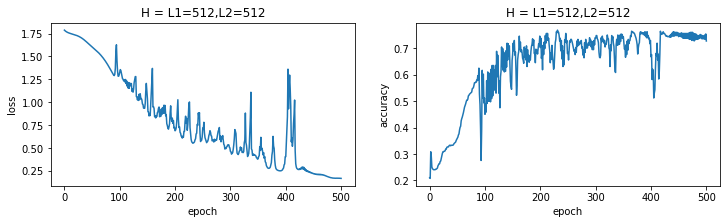

Best model: epoch = 231
Validation accuracy = 0.7695473251028807
Testing accuracy = 0.7283950617283951, precision = 0.711446857073792, recall = 0.7141162371135147, f1 = 0.7007397736685924
{'accuracy_validate': 0.7695473251028807, 'accuracy_test': 0.7283950617283951, 'model': GnnTwoHiddenLayer(
  (layer1): GINConv(
    (apply_func): Linear(in_features=3703, out_features=512, bias=True)
  )
  (layer2): GINConv(
    (apply_func): Linear(in_features=512, out_features=512, bias=True)
  )
  (layer3): GINConv(
    (apply_func): Linear(in_features=512, out_features=6, bias=True)
  )
  (dropout): Dropout(p=0.3, inplace=False)
)}


,hidden_dim,best_accuracy_validate,accuracy_test,precision,recall,f1,train_time (s)
0,"L1=512,L2=512",0.769547,0.728395,0.711447,0.714116,0.70074,593.139566


In [24]:
# Train GNN

learning_rate_list = [0.2]

models = []
result_table = [['hidden_dim', 'best_accuracy_validate',
                 'accuracy_test', 'precision', 'recall', 'f1', 'train_time (s)']]
for learning_rate in learning_rate_list:
    for model, H in zip(models_2_hidden_layer, hidden_2_layer_dim_list):
        print(
            f"\n==== L1={H[0]},L2={H[1]} hidden units =======================================")
        print('learning_rate=', learning_rate)
        print(model)
        returned_model, _result = trainTestGNN(g,
                                               dataset={'features': features, 'labels': labels,
                                                        'train_mask': train_mask, 'val_mask': val_mask},
                                               model=model,
                                               result_table=result_table,
                                               hidden_dim=f'L1={H[0]},L2={H[1]}',
                                               learning_rate=learning_rate,
                                               epochs=501,
                                               )
        result_table.append(_result)
        print(returned_model)
        models.append(returned_model)

df = pd.DataFrame(result_table[1:], columns=result_table[0])

saveResultTable(df, filename='q2a_result')

# print(df.to_markdown())

df

|    | hidden_dim      |   best_accuracy_validate |   accuracy_test |   precision |   recall |       f1 |   train_time (s) |
|---:|:----------------|-------------------------:|----------------:|------------:|---------:|---------:|-----------------:|
|  0 | L1=512,L2=512   |                 0.773663 |        0.748971 |    0.715891 | 0.711086 | 0.711452 |          717.948 |
|  1 | L1=2048,L2=1024 |                 0.773663 |        0.757202 |    0.73627  | 0.702327 | 0.703189 |         2036.08  |

In [25]:
# Save the GNN with highest testing accuracy

max_accuracy_test = max([item['accuracy_test']
                        for item in models])
print(max_accuracy_test)
_model = [
    item for item in models if item['accuracy_test'] == max_accuracy_test]
print(_model)
save_checkpoint("best_model.pth", _model[0]['model'])

0.7283950617283951
[{'accuracy_validate': 0.7695473251028807, 'accuracy_test': 0.7283950617283951, 'model': GnnTwoHiddenLayer(
  (layer1): GINConv(
    (apply_func): Linear(in_features=3703, out_features=512, bias=True)
  )
  (layer2): GINConv(
    (apply_func): Linear(in_features=512, out_features=512, bias=True)
  )
  (layer3): GINConv(
    (apply_func): Linear(in_features=512, out_features=6, bias=True)
  )
  (dropout): Dropout(p=0.3, inplace=False)
)}]
model saved to best_model.pth


### q2a) Test the saved `best_model`

In [27]:
# Load and test the saved `best_model`

_model = models_2_hidden_layer[0] #just get the untrained GNN with the same structure
load_checkpoint("best_model.pth", _model)

# the test_mask here is hidden for you. you can replace the test_mask with the val_mask.
accuracy, precision, recall, f1  = test(model, features, labels, val_mask)
print("Testing Acc {:.4}".format(accuracy))

model loaded from best_model.pth
Testing Acc 0.7284


`Testing Acc 0.7284`

# Hi Professor/TA, my GNN has at least `7x%` accuracy on `val_mask` data. If you get `6x%` accuracy or lower, please `restart and re-run this notebook`. Thanks!


## Q2(b) Generate a random feature matrix
Generate a random feature matrix with the same shape (number-of-nodes $×$ feature-dimensionality) as the original feature matrix. Each element in the random feature matrix is randomly sampled from the uniform distribution between \[0, 1) (use `np.random.rand()` to generate the random feature matrix and please set your random seed to be 5008).

In [28]:
# Set random seed to be 5008
np.random.seed(5008)

num_nodes = g.number_of_nodes()
dim_fea = features.shape[1]

# Features (a matrix of num_nodes-by-dim_fea) for nodes:
random_features = np.random.rand(num_nodes, dim_fea)
random_features = torch.tensor(random_features, dtype=torch.float).to(device)

print(random_features.shape)
random_features

torch.Size([3327, 3703])


tensor([[0.2543, 0.7697, 0.6631,  ..., 0.7941, 0.3833, 0.0490],
        [0.7852, 0.1645, 0.6790,  ..., 0.6268, 0.9838, 0.8308],
        [0.7747, 0.6872, 0.3377,  ..., 0.7927, 0.0173, 0.1214],
        ...,
        [0.7857, 0.6510, 0.7273,  ..., 0.3749, 0.5346, 0.6119],
        [0.3709, 0.1872, 0.0373,  ..., 0.0852, 0.5150, 0.5788],
        [0.0311, 0.0497, 0.4849,  ..., 0.0730, 0.1783, 0.9093]])

## Q2(c) 

Using the same model you have in `(a)`, re-train it with the random features you generated in `(b)`. Name this new model `"best_model_random.pth"`.
* Report the validation set accuracy (using `val_mask`) obtained by the model here. 
* Compare your results in `(a)` and comment on the results.

    


==== L1=512,L2=512 hidden units =======================================
learning_rate= 0.2
GnnTwoHiddenLayer(
  (layer1): GINConv(
    (apply_func): Linear(in_features=3703, out_features=512, bias=True)
  )
  (layer2): GINConv(
    (apply_func): Linear(in_features=512, out_features=512, bias=True)
  )
  (layer3): GINConv(
    (apply_func): Linear(in_features=512, out_features=6, bias=True)
  )
  (dropout): Dropout(p=0.3, inplace=False)
)
loss: 134.072296, accuracy: 0.209877, 10_epochs_time(s): 1.291516  [    0/  501]
loss: 114682380288.000000, accuracy: 0.209877, 10_epochs_time(s): 8.993666  [   10/  501]
loss: 1.841689, accuracy: 0.207819, 10_epochs_time(s): 8.487970  [   20/  501]
loss: 1.804583, accuracy: 0.207819, 10_epochs_time(s): 8.897398  [   30/  501]
loss: 1.783628, accuracy: 0.207819, 10_epochs_time(s): 8.589367  [   40/  501]
loss: 1.771907, accuracy: 0.207819, 10_epochs_time(s): 8.404878  [   50/  501]
loss: 1.765379, accuracy: 0.207819, 10_epochs_time(s): 8.416612  [   6

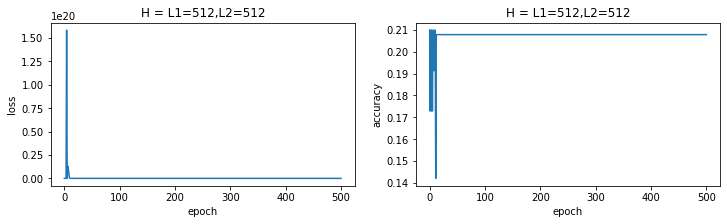

Best model: epoch = 0
Validation accuracy = 0.20987654320987653
Testing accuracy = 0.18106995884773663, precision = 0.04130503642698764, recall = 0.14449112978524745, f1 = 0.05744069779810659
{'accuracy_validate': 0.20987654320987653, 'accuracy_test': 0.18106995884773663, 'model': GnnTwoHiddenLayer(
  (layer1): GINConv(
    (apply_func): Linear(in_features=3703, out_features=512, bias=True)
  )
  (layer2): GINConv(
    (apply_func): Linear(in_features=512, out_features=512, bias=True)
  )
  (layer3): GINConv(
    (apply_func): Linear(in_features=512, out_features=6, bias=True)
  )
  (dropout): Dropout(p=0.3, inplace=False)
)}


,hidden_dim,best_accuracy_validate,accuracy_test,precision,recall,f1,train_time (s)
0,"L1=512,L2=512",0.769547,0.728395,0.711447,0.714116,0.700740,593.139566
1,"L1=512,L2=512",0.209877,0.181070,0.041305,0.144491,0.057441,591.362552


In [29]:
# Train GNN

learning_rate_list = [0.2]

models = []
# result_table = [['hidden_dim', 'best_accuracy_validate',
#                  'accuracy_test', 'precision', 'recall', 'f1', 'train_time (s)']]
for learning_rate in learning_rate_list:
    for model, H in zip(models_2_hidden_layer, hidden_2_layer_dim_list):
        print(
            f"\n==== L1={H[0]},L2={H[1]} hidden units =======================================")
        print('learning_rate=', learning_rate)
        print(model)
        returned_model, _result = trainTestGNN(g,
                                               dataset={'features': random_features, 'labels': labels,
                                                        'train_mask': train_mask, 'val_mask': val_mask},
                                               model=model,
                                               result_table=result_table,
                                               hidden_dim=f'L1={H[0]},L2={H[1]}',
                                               learning_rate=learning_rate,
                                               epochs=501,
                                               )
        result_table.append(_result)
        print(returned_model)
        models.append(returned_model)

df = pd.DataFrame(result_table[1:], columns=result_table[0])
df

In [30]:
saveResultTable(df, filename='q2c_random_result')
# print(df.to_markdown())

|    | hidden_dim    |   best_accuracy_validate |   accuracy_test |   precision |   recall |        f1 |   train_time (s) |
|---:|:--------------|-------------------------:|----------------:|------------:|---------:|----------:|-----------------:|
|  0 | L1=512,L2=512 |                 0.769547 |        0.728395 |    0.711447 | 0.714116 | 0.70074   |          593.14  |
|  1 | L1=512,L2=512 |                 0.209877 |        0.18107  |    0.041305 | 0.144491 | 0.0574407 |          591.363 |


In [31]:
# Save the GNN with highest testing accuracy
max_accuracy_test = max([item['accuracy_test']
                        for item in models])
print(max_accuracy_test)
_model = [
    item for item in models if item['accuracy_test'] == max_accuracy_test]
print(_model)
save_checkpoint("best_model_random.pth", _model[0]['model'])

0.18106995884773663
[{'accuracy_validate': 0.20987654320987653, 'accuracy_test': 0.18106995884773663, 'model': GnnTwoHiddenLayer(
  (layer1): GINConv(
    (apply_func): Linear(in_features=3703, out_features=512, bias=True)
  )
  (layer2): GINConv(
    (apply_func): Linear(in_features=512, out_features=512, bias=True)
  )
  (layer3): GINConv(
    (apply_func): Linear(in_features=512, out_features=6, bias=True)
  )
  (dropout): Dropout(p=0.3, inplace=False)
)}]
model saved to best_model_random.pth


### q2c) Test the saved `best_model_random`

In [32]:
load_checkpoint("best_model_random.pth", model)

# the test_mask here is hidden for you. you can replace the test_mask with the val_mask.
accuracy, precision, recall, f1  = test(model, random_features, labels, val_mask)
print("Testing Acc {:.4}".format(accuracy))

model loaded from best_model_random.pth
Testing Acc 0.2078


Result:

|    | hidden_dim    |   best_accuracy_validate |   accuracy_test |   precision |   recall |        f1 |   train_time (s) |
|---:|:--------------|-------------------------:|----------------:|------------:|---------:|----------:|-----------------:|
|  1 | L1=512,L2=512 |                 0.209877 |        0.18107  |    0.041305 | 0.144491 | 0.0574407 |          591.363 |

validation set accuracy = `20.78 %`


### q2c) Compare your results in (a) and comment on the results.

Result in `(c)`: `Testing Acc is 0.2078`

Result in `(a)`: `Testing Acc is 0.7284`

<u>**Comment**</u>:

The `(c)` GNN of random features performs worse than `(a)` GNN. 

**Reason:**

There are specific patterns/characteristics in the features of each node in `(a)`, the features with same class label are not random. Nodes with the same class label share similar patterns/characteristics in their features. The GNN can extract those patterns from features during the training phase. Then, GNN can know which feature pattern/characteristic belongs to which class label, and can classify the new-coming nodes by comparing the feature patterns of the new-coming nodes to the learned patterns.

But in `(c)`, the features of nodes are randomly generated. Random features of nodes do not share similar patterns/characteristics. The extracted features of nodes with same class label by GNN are totally different, and hence the GNN fails to classify the new coming nodes according to the learned patterns in the `training` dataset.
